In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3188,0587-DMGBH,Female,0,No,No,8,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.85,365.55,Yes
4046,0440-QEXBZ,Female,0,No,No,44,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.15,2139.1,No
5901,6172-FECYY,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,4254.85,Yes
181,6582-OIVSP,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.30,45.3,No
2784,7295-JOMMD,Female,0,No,Yes,4,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,396.3,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges) #it was in string formate

ValueError: Unable to parse string " " at position 488

Hmmm... some values seems to be not numbers but blank string. Let's find out such rows

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488] #total charge is blank

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [11]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #it was in string formate

/var/folders/bn/5cx5hxvs017dqx78mb5kyzkh0000gn/T/ipykernel_44994/1157753429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #it was in string formate


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

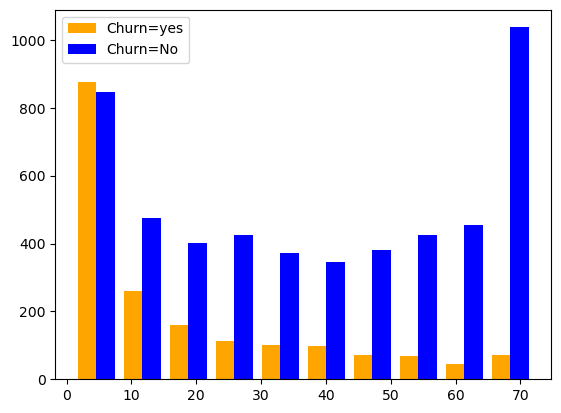

In [18]:
plt.hist([tenure_churn_yes,tenure_churn_no], color=['orange', 'blue'], label=['Churn=yes', 'Churn=No'])
plt.legend()

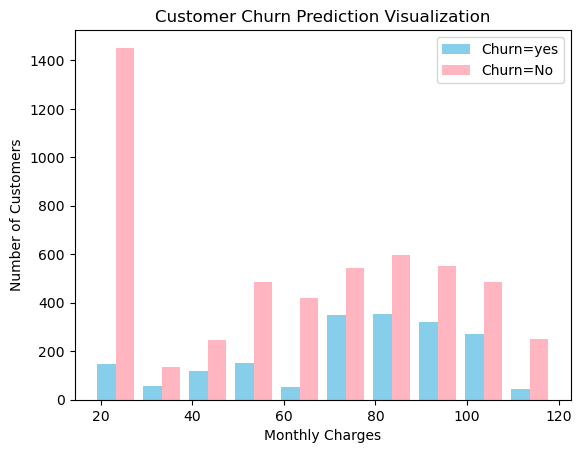

In [19]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes,mc_churn_no], color=['skyblue', 'lightpink'], label=['Churn=yes', 'Churn=No'])
plt.legend()

In [20]:
for column in df1:
    if df1[column].dtypes == 'object':
        print(column)
        print(df[column].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [22]:
df1.replace("No internet service", 'No')
df1.replace("No phone service", 'No')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
for column in df1:
    if df1[column].dtypes == 'object':
        print(column)
        print(df1[column].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [28]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaperlessBilling', 'Churn']
                  
for col in yes_no_columns:
    df1[col] = df1[col].replace({'Yes': 1, 'No': 0})


/var/folders/bn/5cx5hxvs017dqx78mb5kyzkh0000gn/T/ipykernel_44994/3039444962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].replace({'Yes': 1, 'No': 0})


In [29]:
for column in df1:
        print(column)
        print(df1[column].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]


In [30]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/bn/5cx5hxvs017dqx78mb5kyzkh0000gn/T/ipykernel_44994/698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [31]:
for column in df1:
        print(column)
        print(df1[column].unique())

gender
[1 0]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
[0 1]
MultipleLines
[0 1]
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
[0 1]
OnlineBackup
[1 0]
DeviceProtection
[0 1]
TechSupport
[0 1]
StreamingTV
[0 1]
StreamingMovies
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]


In [32]:
df1.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [33]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:

df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6385,0,0,0,1,4,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
5935,0,1,0,0,13,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
2460,1,0,1,1,48,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
5076,1,0,1,1,33,1,0,0,0,1,...,False,True,False,False,True,False,False,False,True,False
899,0,0,1,0,50,1,1,1,1,0,...,False,True,False,True,False,False,False,True,False,False


In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [39]:
bool_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 
                'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Convert True/False to 1/0
for col in bool_columns:
    df2[col] = df2[col].astype(int)


In [40]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6912,0,0,0,0,9,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4895,1,1,1,0,44,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4744,0,1,0,0,64,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
836,0,0,1,1,62,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
6468,0,0,1,0,14,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [42]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [43]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [44]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [45]:
X_train.shape

(5625, 26)

In [46]:
X_test.shape

(1407, 26)

In [47]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [48]:
len(X_train.columns)

26

## Build a model (ANN) in tensorflow/keras

In [49]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.6890 - loss: 0.5910
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7917 - loss: 0.4346
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8024 - loss: 0.4155
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8040 - loss: 0.4144
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8011 - loss: 0.4106
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8019 - loss: 0.4152
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8053 - loss: 0.4025
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8061 - loss: 0.4062
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8091 - loss: 0.4044
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8130 - loss: 0.4025
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8143 - loss: 0.3933
Epoch 12/100
176/176 ━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8328 - loss: 0.3499
Epoch 68/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8353 - loss: 0.3548
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8479 - loss: 0.3380
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8301 - loss: 0.3601
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8439 - loss: 0.3388
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8423 - loss: 0.3528
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8401 - loss: 0.3464
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8407 - loss: 0.3504
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.8405 - loss: 0.3450
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8319 - loss: 0.3556
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8382 - loss: 0.3513
Epoch 78/100
176/176 ━━

In [50]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7639 - loss: 0.5017


[0.5132499933242798, 0.7562189102172852]

In [51]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


array([[0.13345039],
       [0.5239759 ],
       [0.00382706],
       [0.74306977],
       [0.33921516]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [54]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       999
           1       0.59      0.50      0.55       408

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

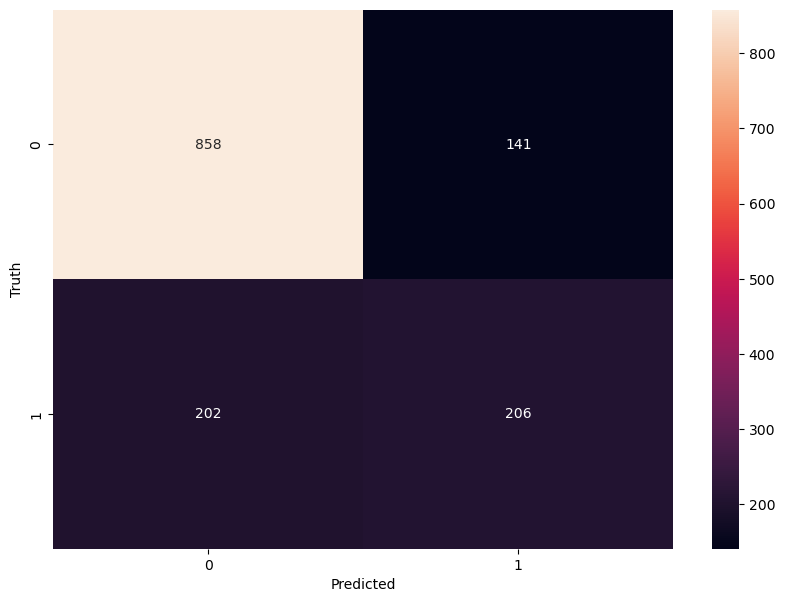

In [56]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
y_test.shape

(1407,)

In [58]:
df = pd.read_csv('Churn_Modelling.csv')

In [59]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
694,695,15681068,Chinagorom,796,France,Female,45,2,109730.22,1,1,1,123882.73,0
6949,6950,15704681,Yeh,766,Germany,Male,37,2,99660.13,2,0,1,147700.78,0
1568,1569,15618314,Chu,676,France,Male,40,8,114005.78,1,1,1,67998.45,0
669,670,15662397,Small,640,France,Female,42,5,176099.13,1,1,1,8404.73,0
1508,1509,15701200,Lucciano,576,France,Male,36,6,0.00,2,1,1,48314.00,0


In [60]:
df.drop('CustomerId',axis='columns',inplace=True)

In [61]:
df.sample(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6251,6252,Smith,682,France,Female,37,8,148580.12,1,1,0,35179.18,0
9074,9075,Howarth,608,France,Female,41,5,0.00,2,1,1,72462.25,0
5599,5600,She,579,Germany,Female,50,5,117721.02,1,0,1,192146.63,1
4436,4437,Golovanov,508,France,Male,26,7,205962.00,1,1,0,156424.40,0
9918,9919,Ubanwa,652,Spain,Male,31,1,132862.59,1,0,0,158054.49,0


In [63]:
df.drop('Surname',axis='columns',inplace=True)

In [65]:
df.drop('RowNumber',axis='columns',inplace=True)

In [66]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [68]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [69]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8249,586,France,1,38,6,0.00,2,1,1,37935.83,0
9279,727,France,0,62,5,0.00,2,0,1,38652.96,0
503,638,Spain,0,44,9,77637.35,2,1,1,111346.22,0
1172,647,Germany,1,43,3,122717.53,2,1,1,87000.39,0
9303,698,Spain,1,38,1,171848.38,1,0,0,16957.45,0


In [71]:
cols_to_scale = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [73]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
581,0.514,Spain,1,0.202703,2,0.432175,0.333333,0,1,0.546451,1
9012,0.380,France,0,0.310811,3,0.000000,0.333333,1,0,0.605493,0
5302,0.702,France,0,0.283784,9,0.558940,0.000000,0,1,0.733272,0
9985,0.618,France,0,0.243243,6,0.493593,0.333333,1,0,0.484153,0
7667,0.894,France,0,0.148649,1,0.000000,0.000000,0,1,0.749970,0
5785,0.806,France,0,0.405405,4,0.000000,0.333333,0,1,0.734119,0
39,0.464,Germany,0,0.310811,6,0.280391,0.333333,0,1,0.890397,0
9375,0.618,Germany,0,0.405405,4,0.492603,0.333333,1,0,0.412327,1
5944,0.692,Germany,0,0.337838,4,0.454732,0.000000,0,1,0.799459,0
2020,0.554,Germany,1,0.162162,6,0.230410,0.000000,1,0,0.941324,0


In [74]:
unique_geography = df['Geography'].unique()

print(unique_geography)

['France' 'Spain' 'Germany']


In [75]:
classes = ['France' 'Spain' 'Germany']

In [77]:
# Convert Geography to integer labels
df['Geography_Label'] = df['Geography'].astype('category').cat.codes

In [78]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Label
2815,0.688,Germany,0,0.256757,1,0.381305,0.333333,1,0,0.501668,0,1
9684,0.862,France,0,0.202703,3,0.355828,0.000000,1,0,0.034740,0,0
9465,0.970,France,1,0.513514,2,0.000000,0.333333,1,1,0.199062,0,0
1413,0.306,Germany,0,0.162162,10,0.544534,0.333333,0,0,0.236516,0,1
3267,0.714,Germany,1,0.297297,3,0.436944,0.000000,1,0,0.946863,0,1
1758,0.584,Germany,1,0.162162,5,0.517157,0.000000,1,0,0.002855,0,1
7997,0.230,Germany,0,0.081081,6,0.621795,0.000000,1,0,0.956875,0,1
803,0.322,Spain,1,0.148649,9,0.000000,0.333333,0,1,0.703394,0,2
3266,0.374,Spain,0,0.162162,1,0.411076,0.000000,1,1,0.482765,0,2
7682,0.700,Spain,0,0.148649,8,0.000000,0.333333,0,1,0.760500,0,2


In [79]:
df1 = df.drop('Geography', axis=1)

In [80]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Label
0,0.538,1,0.324324,2,0.000000,0.000000,1,1,0.506735,1,0
1,0.516,1,0.310811,1,0.334031,0.000000,0,1,0.562709,0,2
2,0.304,1,0.324324,8,0.636357,0.666667,1,0,0.569654,1,0
3,0.698,1,0.283784,1,0.000000,0.333333,0,0,0.469120,0,0
4,1.000,1,0.337838,2,0.500246,0.000000,1,1,0.395400,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,5,0.000000,0.333333,1,0,0.481341,0,0
9996,0.332,0,0.229730,10,0.228657,0.000000,1,1,0.508490,0,0
9997,0.718,1,0.243243,7,0.000000,0.000000,0,1,0.210390,1,0
9998,0.844,0,0.324324,3,0.299226,0.333333,1,0,0.464429,1,1


In [81]:
X = df1.drop('IsActiveMember',axis='columns')
y = df1['IsActiveMember']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [83]:
X_train.shape

(8000, 10)

In [84]:
X_test.shape

(2000, 10)

In [106]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(10,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000


/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.5306 - loss: 0.6919
Epoch 2/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.5621 - loss: 0.6829
Epoch 3/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5725 - loss: 0.6771
Epoch 4/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5730 - loss: 0.6741
Epoch 5/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5691 - loss: 0.6742
Epoch 6/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.5726 - loss: 0.6691
Epoch 7/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5694 - loss: 0.6627
Epoch 8/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5702 - loss: 0.6606
Epoch 9/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5743 - loss: 0.6631
Epoch 10/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5781 - loss: 0.6566
Epoch 11/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.5719 - loss: 0.6549
Epoch 12/2000
250/250

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6277 - loss: 0.6130
Epoch 67/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.6190 - loss: 0.6164
Epoch 68/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6205 - loss: 0.6151
Epoch 69/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6235 - loss: 0.6148
Epoch 70/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6261 - loss: 0.6128
Epoch 71/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6280 - loss: 0.6124
Epoch 72/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6217 - loss: 0.6210
Epoch 73/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6178 - loss: 0.6120
Epoch 74/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6127 - loss: 0.6140
Epoch 75/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.6233 - loss: 0.6116
Epoch 76/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6321 - loss: 0.6083
Epoch 77/2000

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.6483 - loss: 0.5806
Epoch 132/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.6656 - loss: 0.5694
Epoch 133/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.6621 - loss: 0.5720
Epoch 134/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.6551 - loss: 0.5725
Epoch 135/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.6630 - loss: 0.5711
Epoch 136/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.6611 - loss: 0.5735
Epoch 137/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.6777 - loss: 0.5622
Epoch 138/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.6727 - loss: 0.5645
Epoch 139/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.6648 - loss: 0.5670
Epoch 140/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.6679 - loss: 0.5701
Epoch 141/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.6551 - loss: 0.5733
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7045 - loss: 0.5285
Epoch 197/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.6893 - loss: 0.5305
Epoch 198/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6779 - loss: 0.5427
Epoch 199/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6877 - loss: 0.5333
Epoch 200/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6877 - loss: 0.5350
Epoch 201/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6805 - loss: 0.5423
Epoch 202/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6801 - loss: 0.5392
Epoch 203/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6852 - loss: 0.5402
Epoch 204/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6947 - loss: 0.5314
Epoch 205/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6861 - loss: 0.5364
Epoch 206/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6805 - loss: 0.5350
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.6941 - loss: 0.5198
Epoch 262/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7028 - loss: 0.5116
Epoch 263/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7103 - loss: 0.5087
Epoch 264/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7098 - loss: 0.5163
Epoch 265/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7043 - loss: 0.5106
Epoch 266/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7083 - loss: 0.5207
Epoch 267/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7018 - loss: 0.5197
Epoch 268/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7091 - loss: 0.5099
Epoch 269/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7079 - loss: 0.5129
Epoch 270/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7161 - loss: 0.5084
Epoch 271/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7127 - loss: 0.5038
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7233 - loss: 0.4943
Epoch 327/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7230 - loss: 0.4952
Epoch 328/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7191 - loss: 0.4908
Epoch 329/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7205 - loss: 0.4869
Epoch 330/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7202 - loss: 0.4909
Epoch 331/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7250 - loss: 0.4849
Epoch 332/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7184 - loss: 0.4904
Epoch 333/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7245 - loss: 0.4858
Epoch 334/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7192 - loss: 0.4869
Epoch 335/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7201 - loss: 0.4866
Epoch 336/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7235 - loss: 0.4915
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7367 - loss: 0.4697
Epoch 392/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7223 - loss: 0.4704
Epoch 393/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7309 - loss: 0.4681
Epoch 394/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7329 - loss: 0.4774
Epoch 395/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7289 - loss: 0.4775
Epoch 396/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7315 - loss: 0.4699
Epoch 397/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7289 - loss: 0.4749
Epoch 398/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7327 - loss: 0.4727
Epoch 399/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7294 - loss: 0.4772
Epoch 400/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7248 - loss: 0.4786
Epoch 401/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7298 - loss: 0.4821
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7447 - loss: 0.4592
Epoch 457/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7542 - loss: 0.4553
Epoch 458/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7332 - loss: 0.4710
Epoch 459/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7462 - loss: 0.4583
Epoch 460/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7353 - loss: 0.4649
Epoch 461/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7328 - loss: 0.4620
Epoch 462/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7360 - loss: 0.4645
Epoch 463/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7322 - loss: 0.4692
Epoch 464/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7330 - loss: 0.4676
Epoch 465/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7401 - loss: 0.4571
Epoch 466/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7444 - loss: 0.4545
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7480 - loss: 0.4571
Epoch 522/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7425 - loss: 0.4549
Epoch 523/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7395 - loss: 0.4574
Epoch 524/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7523 - loss: 0.4393
Epoch 525/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7452 - loss: 0.4491
Epoch 526/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7377 - loss: 0.4566
Epoch 527/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7451 - loss: 0.4691
Epoch 528/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7352 - loss: 0.4659
Epoch 529/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7427 - loss: 0.4589
Epoch 530/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7488 - loss: 0.4440
Epoch 531/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7461 - loss: 0.4488
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7462 - loss: 0.4493
Epoch 587/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7411 - loss: 0.4505
Epoch 588/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7494 - loss: 0.4441
Epoch 589/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7506 - loss: 0.4372
Epoch 590/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7632 - loss: 0.4353
Epoch 591/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7512 - loss: 0.4491
Epoch 592/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7552 - loss: 0.4423
Epoch 593/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7543 - loss: 0.4374
Epoch 594/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7466 - loss: 0.4450
Epoch 595/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7676 - loss: 0.4202
Epoch 596/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7559 - loss: 0.4337
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7567 - loss: 0.4346
Epoch 652/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7544 - loss: 0.4348
Epoch 653/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7460 - loss: 0.4414
Epoch 654/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7501 - loss: 0.4331
Epoch 655/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7572 - loss: 0.4297
Epoch 656/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7434 - loss: 0.4459
Epoch 657/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7460 - loss: 0.4476
Epoch 658/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7438 - loss: 0.4495
Epoch 659/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7511 - loss: 0.4410
Epoch 660/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7529 - loss: 0.4238
Epoch 661/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7546 - loss: 0.4298
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7647 - loss: 0.4217
Epoch 717/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7525 - loss: 0.4428
Epoch 718/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7444 - loss: 0.4459
Epoch 719/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7654 - loss: 0.4253
Epoch 720/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7708 - loss: 0.4167
Epoch 721/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7563 - loss: 0.4281
Epoch 722/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7557 - loss: 0.4343
Epoch 723/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7631 - loss: 0.4135
Epoch 724/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7456 - loss: 0.4319
Epoch 725/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7500 - loss: 0.4329
Epoch 726/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7565 - loss: 0.4240
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7740 - loss: 0.4083
Epoch 782/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7622 - loss: 0.4194
Epoch 783/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7726 - loss: 0.4080
Epoch 784/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7562 - loss: 0.4298
Epoch 785/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7747 - loss: 0.4126
Epoch 786/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7616 - loss: 0.4225
Epoch 787/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7597 - loss: 0.4240
Epoch 788/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7643 - loss: 0.4172
Epoch 789/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7645 - loss: 0.4175
Epoch 790/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.7672 - loss: 0.4196
Epoch 791/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7563 - loss: 0.4281
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7669 - loss: 0.4074
Epoch 847/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7647 - loss: 0.4190
Epoch 848/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7735 - loss: 0.4060
Epoch 849/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7739 - loss: 0.4065
Epoch 850/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7749 - loss: 0.4171
Epoch 851/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.7638 - loss: 0.4283
Epoch 852/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7732 - loss: 0.3985
Epoch 853/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7677 - loss: 0.4074
Epoch 854/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7735 - loss: 0.4053
Epoch 855/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7672 - loss: 0.4224
Epoch 856/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7666 - loss: 0.4150
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7801 - loss: 0.3974
Epoch 912/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7661 - loss: 0.4075
Epoch 913/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7745 - loss: 0.4008
Epoch 914/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7725 - loss: 0.4081
Epoch 915/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7698 - loss: 0.4170
Epoch 916/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7621 - loss: 0.4185
Epoch 917/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7751 - loss: 0.4007
Epoch 918/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7633 - loss: 0.4062
Epoch 919/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7757 - loss: 0.4047
Epoch 920/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7745 - loss: 0.4093
Epoch 921/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7573 - loss: 0.4251
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7770 - loss: 0.4160
Epoch 977/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7825 - loss: 0.3924
Epoch 978/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7732 - loss: 0.4012
Epoch 979/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7703 - loss: 0.4042
Epoch 980/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7734 - loss: 0.4070
Epoch 981/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7773 - loss: 0.4015
Epoch 982/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7706 - loss: 0.4040
Epoch 983/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7693 - loss: 0.4025
Epoch 984/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7750 - loss: 0.3958
Epoch 985/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7662 - loss: 0.4163
Epoch 986/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7785 - loss: 0.3990
Epo

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7745 - loss: 0.4049
Epoch 1041/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7706 - loss: 0.4101
Epoch 1042/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7704 - loss: 0.4055
Epoch 1043/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7797 - loss: 0.3902
Epoch 1044/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7797 - loss: 0.3865
Epoch 1045/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7864 - loss: 0.3885
Epoch 1046/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7840 - loss: 0.3909
Epoch 1047/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7736 - loss: 0.3951
Epoch 1048/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7738 - loss: 0.3980
Epoch 1049/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7783 - loss: 0.3970
Epoch 1050/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7752 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7820 - loss: 0.3916
Epoch 1105/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7858 - loss: 0.3875
Epoch 1106/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7701 - loss: 0.3988
Epoch 1107/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7856 - loss: 0.3823
Epoch 1108/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7686 - loss: 0.4249
Epoch 1109/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7739 - loss: 0.4088
Epoch 1110/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7785 - loss: 0.3872
Epoch 1111/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7880 - loss: 0.3880
Epoch 1112/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7840 - loss: 0.3850
Epoch 1113/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7888 - loss: 0.3815
Epoch 1114/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7792 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7845 - loss: 0.3852
Epoch 1169/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7745 - loss: 0.3910
Epoch 1170/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7838 - loss: 0.3838
Epoch 1171/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7859 - loss: 0.3935
Epoch 1172/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7788 - loss: 0.4095
Epoch 1173/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7805 - loss: 0.4049
Epoch 1174/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7811 - loss: 0.3898
Epoch 1175/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7780 - loss: 0.3982
Epoch 1176/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7889 - loss: 0.3821
Epoch 1177/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7817 - loss: 0.3886
Epoch 1178/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7856 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.7802 - loss: 0.3849
Epoch 1233/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.7862 - loss: 0.3883
Epoch 1234/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7741 - loss: 0.3953
Epoch 1235/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7749 - loss: 0.4186
Epoch 1236/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7747 - loss: 0.4018
Epoch 1237/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7968 - loss: 0.3759
Epoch 1238/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7854 - loss: 0.3892
Epoch 1239/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7922 - loss: 0.3789
Epoch 1240/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7953 - loss: 0.3734
Epoch 1241/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7839 - loss: 0.3870
Epoch 1242/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7889 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7855 - loss: 0.3854
Epoch 1297/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7895 - loss: 0.3827
Epoch 1298/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7904 - loss: 0.3705
Epoch 1299/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7844 - loss: 0.3820
Epoch 1300/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7895 - loss: 0.3756
Epoch 1301/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7855 - loss: 0.3818
Epoch 1302/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7814 - loss: 0.3847
Epoch 1303/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7840 - loss: 0.3886
Epoch 1304/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7783 - loss: 0.4023
Epoch 1305/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7836 - loss: 0.3967
Epoch 1306/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7889 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7941 - loss: 0.3674
Epoch 1361/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7887 - loss: 0.3706
Epoch 1362/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7882 - loss: 0.3833
Epoch 1363/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7858 - loss: 0.3825
Epoch 1364/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7775 - loss: 0.3807
Epoch 1365/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7822 - loss: 0.3886
Epoch 1366/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7854 - loss: 0.3767
Epoch 1367/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7818 - loss: 0.3829
Epoch 1368/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7919 - loss: 0.3926
Epoch 1369/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7746 - loss: 0.4058
Epoch 1370/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7879 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7784 - loss: 0.3925
Epoch 1425/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7906 - loss: 0.3743
Epoch 1426/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7878 - loss: 0.3739
Epoch 1427/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7885 - loss: 0.3731
Epoch 1428/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7861 - loss: 0.3700
Epoch 1429/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7973 - loss: 0.3678
Epoch 1430/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7952 - loss: 0.3693
Epoch 1431/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7881 - loss: 0.3793
Epoch 1432/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7929 - loss: 0.3811
Epoch 1433/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7721 - loss: 0.4176
Epoch 1434/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7870 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.7807 - loss: 0.3738
Epoch 1489/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.7974 - loss: 0.3709
Epoch 1490/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7913 - loss: 0.3799
Epoch 1491/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7849 - loss: 0.3776
Epoch 1492/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7991 - loss: 0.3629
Epoch 1493/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7843 - loss: 0.3828
Epoch 1494/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7923 - loss: 0.3762
Epoch 1495/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7810 - loss: 0.3866
Epoch 1496/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7981 - loss: 0.3681
Epoch 1497/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7969 - loss: 0.3735
Epoch 1498/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7803 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7938 - loss: 0.3847
Epoch 1553/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7881 - loss: 0.3749
Epoch 1554/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7867 - loss: 0.3717
Epoch 1555/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7918 - loss: 0.3919
Epoch 1556/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7931 - loss: 0.3746
Epoch 1557/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7967 - loss: 0.3687
Epoch 1558/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7851 - loss: 0.3877
Epoch 1559/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7903 - loss: 0.3774
Epoch 1560/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7845 - loss: 0.3813
Epoch 1561/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7946 - loss: 0.3715
Epoch 1562/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7874 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7807 - loss: 0.3931
Epoch 1617/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7954 - loss: 0.3790
Epoch 1618/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7781 - loss: 0.4037
Epoch 1619/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7799 - loss: 0.4042
Epoch 1620/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7974 - loss: 0.3701
Epoch 1621/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7961 - loss: 0.3593
Epoch 1622/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7941 - loss: 0.3619
Epoch 1623/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8024 - loss: 0.3581
Epoch 1624/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7834 - loss: 0.3784
Epoch 1625/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7925 - loss: 0.3705
Epoch 1626/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7893 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7979 - loss: 0.3621
Epoch 1681/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7919 - loss: 0.3714
Epoch 1682/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7967 - loss: 0.3701
Epoch 1683/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7861 - loss: 0.4013
Epoch 1684/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7781 - loss: 0.4202
Epoch 1685/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7976 - loss: 0.3739
Epoch 1686/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7910 - loss: 0.3598
Epoch 1687/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8106 - loss: 0.3522
Epoch 1688/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7886 - loss: 0.3728
Epoch 1689/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7966 - loss: 0.3638
Epoch 1690/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7984 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8030 - loss: 0.3612
Epoch 1745/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7987 - loss: 0.3578
Epoch 1746/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7945 - loss: 0.3678
Epoch 1747/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7844 - loss: 0.4095
Epoch 1748/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7927 - loss: 0.3669
Epoch 1749/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7995 - loss: 0.3556
Epoch 1750/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8030 - loss: 0.3514
Epoch 1751/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7948 - loss: 0.3566
Epoch 1752/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7990 - loss: 0.3640
Epoch 1753/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7936 - loss: 0.3690
Epoch 1754/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7970 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7927 - loss: 0.3572
Epoch 1809/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7968 - loss: 0.3573
Epoch 1810/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8035 - loss: 0.3605
Epoch 1811/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7913 - loss: 0.3729
Epoch 1812/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7875 - loss: 0.3702
Epoch 1813/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8016 - loss: 0.3659
Epoch 1814/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7932 - loss: 0.3612
Epoch 1815/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7966 - loss: 0.3625
Epoch 1816/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8084 - loss: 0.3510
Epoch 1817/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8013 - loss: 0.3549
Epoch 1818/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7911 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7927 - loss: 0.3686
Epoch 1873/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7946 - loss: 0.3709
Epoch 1874/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8041 - loss: 0.3541
Epoch 1875/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8027 - loss: 0.3481
Epoch 1876/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7981 - loss: 0.3562
Epoch 1877/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7891 - loss: 0.3697
Epoch 1878/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8033 - loss: 0.3540
Epoch 1879/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8085 - loss: 0.3441
Epoch 1880/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7878 - loss: 0.3695
Epoch 1881/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7860 - loss: 0.3875
Epoch 1882/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7914 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8067 - loss: 0.3438
Epoch 1937/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8038 - loss: 0.3517
Epoch 1938/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7898 - loss: 0.3778
Epoch 1939/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7888 - loss: 0.3982
Epoch 1940/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8004 - loss: 0.3631
Epoch 1941/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7966 - loss: 0.3730
Epoch 1942/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7874 - loss: 0.4091
Epoch 1943/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7922 - loss: 0.3703
Epoch 1944/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7931 - loss: 0.3745
Epoch 1945/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8004 - loss: 0.3645
Epoch 1946/2000
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8019 - loss: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7964 - loss: 0.3556


In [107]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


array([[0.9321829 ],
       [0.6825234 ],
       [0.09615065],
       [0.46113518],
       [0.5024199 ]], dtype=float32)

In [108]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [109]:
y_pred[:10]

[1, 1, 0, 0, 1, 1, 0, 0, 1, 0]

Text(95.72222222222221, 0.5, 'Truth')

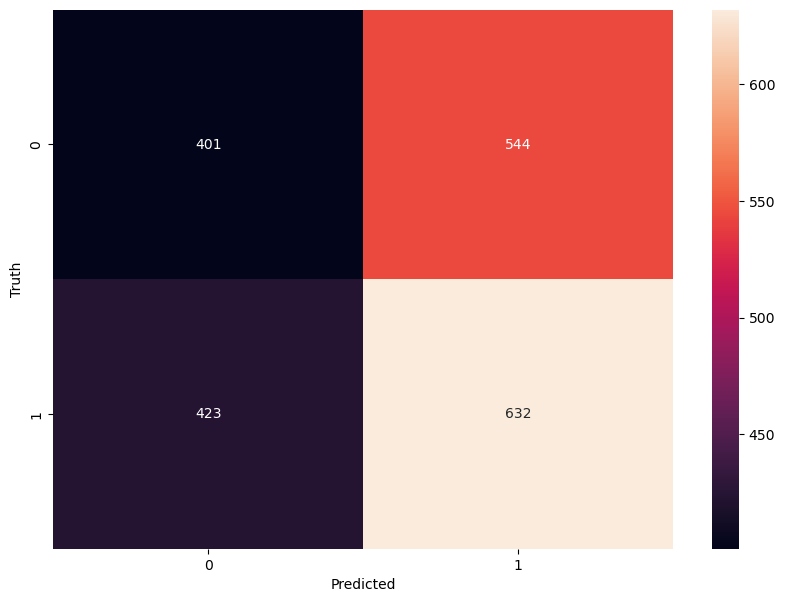

In [110]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       945
           1       0.54      0.60      0.57      1055

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.52      0.51      2000



Key Insights:
Low precision and recall: Both precision and recall are relatively low for class 0, meaning the model struggles to correctly classify this class.
Class imbalance: While the class distribution isn't extremely imbalanced (945 samples for class 0, 1055 for class 1), the model is performing noticeably better for class 1.
Improvement needed: The overall accuracy (52%) is only slightly better than random guessing. You may need to tune your model (using techniques like hyperparameter tuning, feature engineering, or trying different models) to improve performance.
Focus on recall for class 0: The model is missing many instances of class 0, which could be critical depending on your application. You might need to focus on improving recall for class 0 by adjusting the decision threshold or trying different loss functions.

